# [TensorFlow - Python Deep Learning Neural Network API](https://deeplizard.com/learn/playlist/PLZbbT5o_s2xrwRnXk_yCPtnqqo4_u2YGL)

1. [P1: Data Processing](#prepro)
1. [P2: Building a NN](#build)
1. [P3: Train an ANN & P4: Validation Set](#trainval)
1. [P5: Test Set](#testset)
1. [P6: Confusion Matrix](#cm)
1. [P7: Save & Load a Model](#saveload)
1. [P8: Image Preparation for CNNs #1](#imagepre)
1. [P9: Image Preparation for CNNs #2](#imagepre2)
1. [P10: Build & Train a CNN #2](#buildtrainCNN)
1. [P11: CNN Predictions](#CNNpred)
1. [P12; Data Augmentation](#augmentation)
1. [P13: Fine-Tuning VGG16](#tuningvgg16)
1. [P14: Train VGG16](#trainvgg16)
1. [P15: Predict With VGG16](#predictvgg16)
1. [P16: MobileNet Image Classification](#mobilenet)
1. [P17: MobileNet Tuning #1](#mobilenettuning)
1. [P18: MobileNet Tuning #2](#mobilenettuning2)

<a name='prepro'></a>
# [ Part 1: Data Processing](https://deeplizard.com/learn/video/UkzhouEk6uY)

In [1]:
train_labels = []
train_samples = []

Example data:
* An experimental drug was tested on individuals from ages 13 to 100 in a clinical trial.
* The trial had 2100 participants. 50% were < 65 years old, 50% were >=65 years old.
* 95% of patients 65 or older experienced side effects.
* 95% of patients under 65 experienced no side effects.

In [2]:
import numpy as np
from random import randint

for i in range(50):
    # 5% of younger individuals with side effects
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    # 5% of older individuals without side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)
    
for i in range(1000):
    # 95% of younger individuals without side effects
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    # 95% of older individuals with side effects
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(1)

In [3]:
len(train_samples), len(train_labels)

(2100, 2100)

In [4]:
train_samples[:5], train_labels[:5]

([27, 76, 27, 88, 63], [1, 0, 1, 0, 1])

In [5]:
from sklearn.utils import shuffle

# tf expects np arrays as X and y
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)

train_labels, train_samples = shuffle(train_labels, train_samples)

In [6]:
from sklearn.preprocessing import MinMaxScaler

# normalize data
scaler = MinMaxScaler(feature_range=(0,1))
# fit_transform does not accept 1D data, so we must convert them to 2D
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))
print(train_samples.shape, scaled_train_samples.shape)
scaled_train_samples[:5]

(2100,) (2100, 1)


array([[0.98850575],
       [0.13793103],
       [0.33333333],
       [0.42528736],
       [0.83908046]])

<a name='build'></a>
# [ Part 2: Building a NN](https://deeplizard.com/learn/video/Boo6SmgmHuM)

In [7]:
train_samples.shape

(2100,)

Using `Dense` layer along with `input_shape` parameter Keras adds a input for the model behind the scene: [link](https://www.tensorflow.org/api_docs/python/tf/keras/layers/InputLayer)

In [8]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # input layer
    tf.keras.Input(shape=(1, )),
    # hidden layer
    tf.keras.layers.Dense(units=32, activation='relu'),
    # output layer
    tf.keras.layers.Dense(units=2, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                64        
                                                                 
 dense_1 (Dense)             (None, 2)                 66        
                                                                 
Total params: 130
Trainable params: 130
Non-trainable params: 0
_________________________________________________________________


<a name='trainval'></a>
# [Part 3: Train an ANN](https://deeplizard.com/learn/video/EHbay6hDZGA) & [Part 4: Validation Set](https://deeplizard.com/learn/video/dzoh8cfnvnI)

In [9]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import SparseCategoricalCrossentropy

# compile model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

When using `validation_split` make sure to shuffle the data before, as the validation set would be the last portion of the training set!

In [10]:
# train model
model.fit(x=scaled_train_samples,
          y=train_labels,
          validation_split=0.1,
          batch_size=10,
          epochs=50,
          shuffle=True,
          verbose=1)

Epoch 1/50
189/189 [==============================] - 1s 2ms/step - loss: 0.6325 - accuracy: 0.6132 - val_loss: 0.5892 - val_accuracy: 0.7095
Epoch 2/50
189/189 [==============================] - 0s 1ms/step - loss: 0.5412 - accuracy: 0.7587 - val_loss: 0.5063 - val_accuracy: 0.8333
Epoch 3/50
189/189 [==============================] - 0s 1ms/step - loss: 0.4624 - accuracy: 0.8460 - val_loss: 0.4342 - val_accuracy: 0.8810
Epoch 4/50
189/189 [==============================] - 0s 1ms/step - loss: 0.3945 - accuracy: 0.8958 - val_loss: 0.3734 - val_accuracy: 0.8857
Epoch 5/50
189/189 [==============================] - 0s 981us/step - loss: 0.3417 - accuracy: 0.9169 - val_loss: 0.3365 - val_accuracy: 0.9095
Epoch 6/50
189/189 [==============================] - 0s 949us/step - loss: 0.3091 - accuracy: 0.9280 - val_loss: 0.3149 - val_accuracy: 0.9143
Epoch 7/50
189/189 [==============================] - 0s 1ms/step - loss: 0.2923 - accuracy: 0.9344 - val_loss: 0.3038 - val_accuracy: 0.9095
Ep

<a name='testset'></a>
# [Part 5: Test Set](https://deeplizard.com/learn/video/2f-NjDUvZIE)

In [48]:
test_labels = []
test_samples = []

In [50]:
for i in range(10):
    # 5% younger with side effects
    random_younger = randint(13, 64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    # 5% older without side effects
    random_older = randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(200):
    # 95% younger without side effects
    random_younger = randint(13, 64)
    test_samples.append(random_younger)
    test_labels.append(0)

    # 95% older without side effects
    random_older = randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(1)
    
len(test_samples), len(test_labels)

(840, 840)

In [51]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)

test_labels, test_samples = shuffle(test_labels, test_samples)

In [52]:
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))
scaled_test_samples.shape

(840, 1)

In [53]:
y_pred = model.predict(x=scaled_test_samples,
                       batch_size=10, 
                       verbose=1)

84/84 [==============================] - 0s 589us/step


In [54]:
y_pred[:5]

array([[0.02767031, 0.9723297 ],
       [0.00218899, 0.997811  ],
       [0.08600924, 0.91399074],
       [0.95542246, 0.04457757],
       [0.15710142, 0.84289855]], dtype=float32)

In [55]:
# taking the index of the highest probability
rounded_predictions = np.argmax(y_pred, axis=-1)
rounded_predictions[:20]

array([1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1],
      dtype=int64)

In [56]:
test_labels[:20]

array([1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1])

<a name='cm'></a>
# [Part 6: Confusion Matrix](https://deeplizard.com/learn/video/km7pxKy4UHU)

In [57]:
%matplotlib inline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import itertools

In [58]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

`ConfusionMatrixDisplay()` [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_predictions)

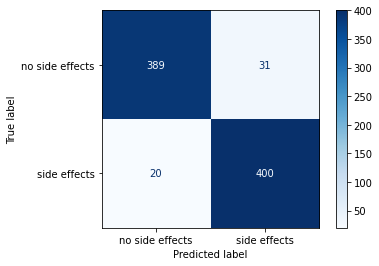

In [59]:
ConfusionMatrixDisplay.from_predictions(y_true=test_labels,
                                        y_pred=rounded_predictions, 
                                       normalize=None,
                                       display_labels=['no side effects', 'side effects'],
                                       cmap=plt.cm.Blues)

<a name='saveload'></a>
# [Part 7: Save & Load a Model](https://deeplizard.com/learn/video/7n1SpeudvAE)
1. [`model.save()`](#modelsave)
1. [`model.to_json()`](#modeltojson)
1. [`model.save_weights()`](#modelsaveweights)

<a name='modelsave'></a>
## 1. `model.save()`

This save functions saves:
* The architecture of the model, allowing to re-create the model.
* The weights of the model.
* The training configuration (loss, optimizer).
* The state of the optimizer, allowing to resume training exactly where you left off.

In [62]:
import os.path

# checks first to see if file exists already
if os.path.isfile('models/medical_trial_model.h5') is False:
    # if not, the model is saved to disk
    model.save('models/medical_trial_model.h5')

In [64]:
from tensorflow.keras.models import load_model

new_model = load_model('models/medical_trial_model.h5')
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                64        
                                                                 
 dense_1 (Dense)             (None, 2)                 66        
                                                                 
Total params: 130
Trainable params: 130
Non-trainable params: 0
_________________________________________________________________


In [66]:
new_model.weights

[<tf.Variable 'dense/kernel:0' shape=(1, 32) dtype=float32, numpy=
 array([[ 0.9751898 , -0.31617704, -0.17165583, -0.18594919, -0.3713359 ,
         -0.3139423 ,  0.6081989 ,  0.5750038 , -0.3882854 , -0.2266617 ,
         -0.05980554,  0.862907  , -0.31454486, -0.01658919, -0.32290697,
         -0.16963299, -0.35988346,  0.9557773 , -0.00471437, -0.40094262,
          0.68413943, -0.2221366 , -0.24561729,  0.697095  , -0.26062983,
          0.8938962 , -0.394385  ,  0.95579475, -0.34643438, -0.25649908,
          0.62692565, -0.10092944]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(32,) dtype=float32, numpy=
 array([-0.3530407 ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.24002156, -0.23007168,  0.        ,  0.7322133 ,
         0.        , -0.33329153,  0.        ,  0.        ,  0.        ,
         0.8292648 ,  0.        , -0.3458223 ,  0.        ,  0.        ,
        -0.26382306,  0.        ,  0.        , -0.26812375,  0.        ,
       

In [67]:
new_model.optimizer

<a name='modeltojson'></a>
## 2. `model.to_json()`

If you only need to __save the architecture of a model__, and not its weights or its training configuration.

In [68]:
# save as JSON
json_string = model.to_json()

# # save as YAML
# yaml_string = model.to_yaml()

In [69]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "input_1"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 2, "activation": "softmax", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regul

In [70]:
from tensorflow.keras.models import model_from_json

# model reconstruction from JSON
model_architecture = model_from_json(json_string)

# from tensorflow.keras.models import model_from_yaml
# # model reconstruction from YAML
# model = model_from_yaml(yaml_string)

In [71]:
model_architecture.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                64        
                                                                 
 dense_1 (Dense)             (None, 2)                 66        
                                                                 
Total params: 130
Trainable params: 130
Non-trainable params: 0
_________________________________________________________________


<a name='modelsaveweights'></a>
## 3. `model.save_weights()`

If you only need to save the weights of the model.

In [72]:
import os.path

# check if files exists already
if os.path.isfile('models/my_model_weights.h5') is False:
    # if not, save the weights to disk
    model.save_weights('models/my_model_weights.h5')

In [73]:
model2 = tf.keras.models.Sequential([
    # input layer
    tf.keras.Input(shape=(1, )),
    # hidden layer
    tf.keras.layers.Dense(units=32, activation='relu'),
    # output layer
    tf.keras.layers.Dense(units=2, activation='softmax')
])

In [74]:
# load weights to model
model2.load_weights('models/my_model_weights.h5')

In [77]:
model2.get_weights()

[array([[ 0.9751898 , -0.31617704, -0.17165583, -0.18594919, -0.3713359 ,
         -0.3139423 ,  0.6081989 ,  0.5750038 , -0.3882854 , -0.2266617 ,
         -0.05980554,  0.862907  , -0.31454486, -0.01658919, -0.32290697,
         -0.16963299, -0.35988346,  0.9557773 , -0.00471437, -0.40094262,
          0.68413943, -0.2221366 , -0.24561729,  0.697095  , -0.26062983,
          0.8938962 , -0.394385  ,  0.95579475, -0.34643438, -0.25649908,
          0.62692565, -0.10092944]], dtype=float32),
 array([-0.3530407 ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.24002156, -0.23007168,  0.        ,  0.7322133 ,
         0.        , -0.33329153,  0.        ,  0.        ,  0.        ,
         0.8292648 ,  0.        , -0.3458223 ,  0.        ,  0.        ,
        -0.26382306,  0.        ,  0.        , -0.26812375,  0.        ,
        -0.33967197,  0.        , -0.3458579 ,  0.        ,  0.        ,
        -0.24100862,  0.        ], dtype=float32),
 array([[-1.15

 <a name='imagepre'></a>
 # [P8: Image Preparation for CNNs #1](https://deeplizard.com/learn/video/LhEMXbjGV_4)

[Dogs vs. Cats dataset](https://www.kaggle.com/c/dogs-vs-cats/data)

In [80]:
import glob
import random
import shutil

# organize data into train, valid, test dirs
os.chdir(r"C:\Users\10inm\deep_learning\Keras-ML-DL-DeepLizard\cats_dogs\train")
# if dir is not already there
if os.path.isdir('train/dog') is False:
    # create the following subfolders
    os.makedirs('train/dog')
    os.makedirs('train/cat')
    os.makedirs('valid/dog')
    os.makedirs('valid/cat')
    os.makedirs('test/dog')
    os.makedirs('test/cat')
    
    # pick randomly 500 cat images
    for c in random.sample(glob.glob('cat*'), 500):
        # move them into the subfolder
        shutil.move(c, 'train/cat')
    for c in random.sample(glob.glob('dog*'), 500):
        shutil.move(c, 'train/dog')
    for c in random.sample(glob.glob('cat*'), 100):
        shutil.move(c, 'valid/cat')
    for c in random.sample(glob.glob('dog*'), 100):
        shutil.move(c, 'valid/dog')
    for c in random.sample(glob.glob('cat*'), 50):
        shutil.move(c, 'test/cat')
    for c in random.sample(glob.glob('dog*'), 50):
        shutil.move(c, 'test/dog')

In [81]:
train_path = r"\deep_learning\Keras-ML-DL-DeepLizard\cats_dogs\train\train"
valid_path = r"\deep_learning\Keras-ML-DL-DeepLizard\cats_dogs\train\valid"
test_path = r"\deep_learning\Keras-ML-DL-DeepLizard\cats_dogs\train\test"

In [84]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
                                    # preprocess according to the vgg16 model, returns a directory iterator
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path,
                         # (height, width)
                         target_size=(224,224),
                         classes=['cat', 'dog'],
                         batch_size=10)

valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)

test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10, shuffle=False)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [86]:
assert train_batches.n == 1000
assert valid_batches.n == 200
assert test_batches.n == 100

In [87]:
# extract just one batch
imgs, labels = next(train_batches)

In [88]:
def plotImages(images_arr):
    """
    This function will plot images in the form of a grid
    with 1 row and 10 columns where images are placed"""
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

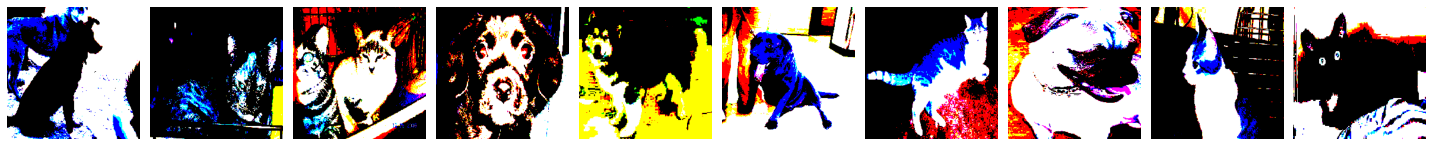

[[0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


In [89]:
# colour processed by the vgg16 model
plotImages(imgs)
print(labels)

 <a name='imagepre2'></a>
 # [P9: Image Preparation for CNNs #2](https://deeplizard.com/learn/video/k63bRldLxGI)
 `steps_per_epoch` parameter ([documentation](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit))

 <a name='buildtrainCNN'></a>
 # [P10: Build & Train a CNN #2](https://deeplizard.com/learn/video/daovGOlMbT4)

In [96]:
from tensorflow.keras import models, layers

# build model
model = models.Sequential([
    # input layer
    layers.Input(shape=(224,224,3)),
    # convolutional layer
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
    # pooling layer (cutting dims in half)
    layers.MaxPool2D(pool_size=(2,2), strides=2),
    # convolutional layer
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    # pooling layer (cutting dims in half)
    layers.MaxPool2D(pool_size=(2,2), strides=2),
    # flatten layer (flatten data to 1D tensor prior passing to Dense)
    layers.Flatten(),
    # output layer
    layers.Dense(units=2, activation='softmax')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 200704)            0         
                                                                 
 dense_5 (Dense)             (None, 2)                

In [97]:
# compile model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [98]:
# no need to specify y; they are included already in the directory iterator
# train model
model.fit(x=train_batches,
          validation_data=valid_batches,
          epochs=10,
          verbose=1)

Epoch 1/10
100/100 [==============================] - 46s 456ms/step - loss: 13.0873 - accuracy: 0.5890 - val_loss: 12.7547 - val_accuracy: 0.5200
Epoch 2/10
100/100 [==============================] - 45s 446ms/step - loss: 3.0906 - accuracy: 0.7660 - val_loss: 3.8885 - val_accuracy: 0.6350
Epoch 3/10
100/100 [==============================] - 44s 443ms/step - loss: 0.8484 - accuracy: 0.8810 - val_loss: 3.4004 - val_accuracy: 0.6500
Epoch 4/10
100/100 [==============================] - 43s 435ms/step - loss: 0.1516 - accuracy: 0.9600 - val_loss: 3.3956 - val_accuracy: 0.6500
Epoch 5/10
100/100 [==============================] - 42s 415ms/step - loss: 0.0428 - accuracy: 0.9880 - val_loss: 2.9279 - val_accuracy: 0.6450
Epoch 6/10
100/100 [==============================] - 43s 431ms/step - loss: 0.0130 - accuracy: 0.9940 - val_loss: 2.6643 - val_accuracy: 0.6900
Epoch 7/10
100/100 [==============================] - 47s 471ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 2.5682 - val_

 <a name='CNNpred'></a>
 # [P11: CNN Predictions](https://deeplizard.com/learn/video/bfQBPNDy5EM)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

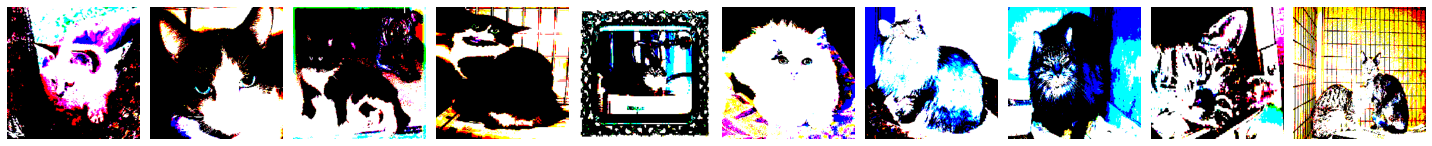

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [99]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [100]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [104]:
y_pred = model.predict(x=test_batches, verbose=0)
rounded_predictions = np.argmax(y_pred, axis=-1)
rounded_predictions

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0], dtype=int64)

In [108]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

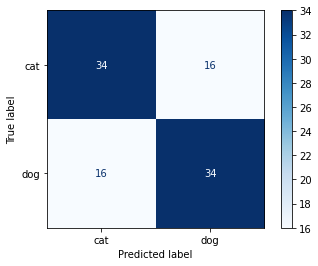

In [107]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=rounded_predictions)

ConfusionMatrixDisplay.from_predictions(y_true=test_batches.classes,
                                        y_pred=rounded_predictions, 
                                       normalize=None,
                                       display_labels=['cat', 'dog'],
                                       cmap=plt.cm.Blues)

 <a name='augmentation'></a>
 # [P12: Data Augmentation](https://deeplizard.com/learn/video/14syUbL16k4)

Data augmentation occurs when you create new data based on modifications of your existing data. In our case, our data will be images.Data augmentation on images would include transformations like:
 - Flipping the image either horizontally or vertically
 - Rotating the image
 - Zooming in or out on the image
 - Cropping the image
 - Varying the color on the image

In [132]:
gen = ImageDataGenerator(rotation_range=10,
                        width_shift_range=0.1,
                        height_shift_range=0.1,
                        shear_range=0.15,
                        zoom_range=0.1,
                        channel_shift_range=10.,
                        horizontal_flip=True)

In [118]:
chosen_image = random.choice(os.listdir(r"C:\Users\10inm\deep_learning\Keras-ML-DL-DeepLizard\cats_dogs\train\train\dog\"))
chosen_image

'dog.2763.jpg'

In [127]:
image_path = "C:\\Users\\10inm\\deep_learning\\Keras-ML-DL-DeepLizard\\cats_dogs\\train\\train\\dog\\" + chosen_image 
image_path

'C:\\Users\\10inm\\deep_learning\\Keras-ML-DL-DeepLizard\\cats_dogs\\train\\train\\dog\\dog.2763.jpg'

In [128]:
assert os.path.isfile(image_path)

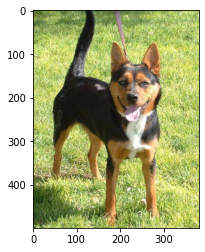

In [144]:
# obtain image
image = np.expand_dims(plt.imread(image_path), 0)
plt.imshow(image[0])

If you'd like to __save__ these images so that you can __add them to your training set__, then to `gen.flow()`, you should also specify the parameter `save_to_dir` and set it equal to a valid location on disk.

You can optionally __specify a prefix__ for which to prepend to file names of the saved augmented images, as well as optionally specify the file type as `'png'` or `'jpeg'` images. `'png'` is the default.

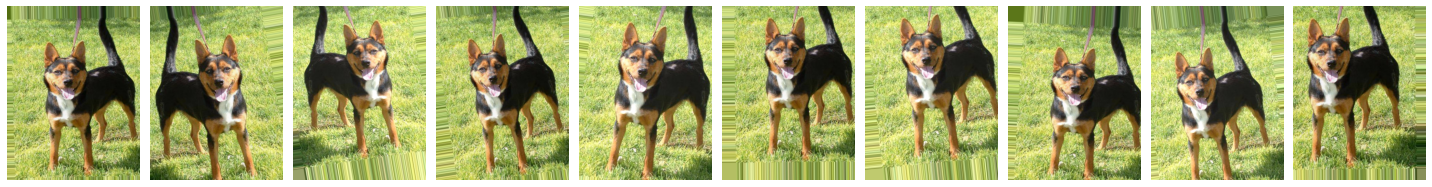

In [146]:
# generate batches of augmented images from this image
aug_iter = gen.flow(image)

# # save augmented image
# aug_iter = gen.flow(image,
#                     save_to_dir=r"C:\Users\10inm\deep_learning\Keras-ML-DL-DeepLizard\cats_dogs\train\train\dog",
#                     save_prefix='aug-image-',
#                     save_format='jpeg')
        
# get 10 samples of augmented images
aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]

# plot images
plotImages(aug_images)

 <a name='tuning'></a>
 # [P13: Fine-Tuning VGG16](https://deeplizard.com/learn/video/oDHpqu52soI)

To understand what preprocessing is needed for images that will be passed to a `VGG16` model, we can look at the [VGG16 paper](https://arxiv.org/pdf/1409.1556.pdf).

Under the _2.1 Architecture section_, we can see that the authors stated that:
> _"The only preprocessing we do is subtracting the mean RGB value, computed on the training set, from each pixel."_

This is the preprocessing that was used on the original training data, and therefore, this is the way we need to process images before passing them to `VGG16` or a fine-tuned `VGG16` model.

This processing is what is causing the underlying color data to look distorted.

In [147]:
# download VGG16
vgg16_model = tf.keras.applications.vgg16.VGG16()

553476096/553467096 [==============================] - 139s 0us/step


In [148]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [154]:
def count_params(model):
    non_trainable_params = np.sum([np.prod(v.get_shape().as_list()) for v in model.non_trainable_weights])
    trainable_params = np.sum([np.prod(v.get_shape().as_list()) for v in model.trainable_weights])
    return {'non_trainable_params': non_trainable_params, 'trainable_params': trainable_params}

In [155]:
params = count_params(vgg16_model)
params

{'non_trainable_params': 0.0, 'trainable_params': 138357544}

In [156]:
assert params['non_trainable_params'] == 0
assert params['trainable_params'] == 138357544

In [157]:
# return the type of the model, e.g. Sequential
type(vgg16_model)

keras.engine.functional.Functional

In [168]:
model = models.Sequential()
# iterate over each layer (except the last)
for layer in vgg16_model.layers[:-1]:
    # add each layer to our Seq model
    model.add(layer)

In [169]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [170]:
# iterate over each layer
for layer in model.layers:
    # freeze the trainable parameters (weights+biases)
    layer.trainable = False

In [171]:
# add output layer
model.add(layers.Dense(units=2, activation='softmax'))

In [172]:
# only our output layer is trainable now (vgg16 is already trained with imgs of cats and dogs!)
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [173]:
params = count_params(model)
assert params['non_trainable_params'] == 134260544
assert params['trainable_params'] == 8194

 <a name='trainvgg16'></a>
 # [P14: Train VGG16](https://deeplizard.com/learn/video/INaX55V1zpY)

In [174]:
# compile model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [175]:
# train model
model.fit(x=train_batches,
          validation_data=valid_batches,
          epochs=5,
          verbose=1)

Epoch 1/5
100/100 [==============================] - 367s 4s/step - loss: 0.3875 - accuracy: 0.8380 - val_loss: 0.1536 - val_accuracy: 0.9450
Epoch 2/5
100/100 [==============================] - 378s 4s/step - loss: 0.1117 - accuracy: 0.9630 - val_loss: 0.1169 - val_accuracy: 0.9750
Epoch 3/5
100/100 [==============================] - 362s 4s/step - loss: 0.0712 - accuracy: 0.9750 - val_loss: 0.0839 - val_accuracy: 0.9700
Epoch 4/5
100/100 [==============================] - 381s 4s/step - loss: 0.0518 - accuracy: 0.9810 - val_loss: 0.0800 - val_accuracy: 0.9750
Epoch 5/5
100/100 [==============================] - 358s 4s/step - loss: 0.0397 - accuracy: 0.9860 - val_loss: 0.0727 - val_accuracy: 0.9750


In [176]:
assert model.history.history.get('accuracy')[-1] > 0.95

 <a name='predictvgg16'></a>
 # [P15: Predict With VGG16](https://deeplizard.com/learn/video/HDom7mAxCdc)

In [177]:
y_pred = model.predict(x=test_batches, verbose=0)

In [178]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [181]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(y_pred, axis=-1))

In [182]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

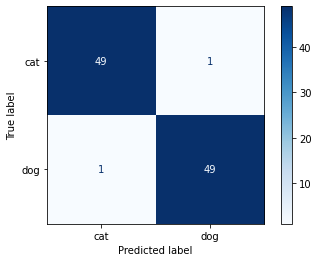

In [184]:
ConfusionMatrixDisplay.from_predictions(y_true=test_batches.classes,
                                        y_pred=np.argmax(y_pred, axis=-1), 
                                       normalize=None,
                                       display_labels=['cat', 'dog'],
                                       cmap=plt.cm.Blues)

 <a name='mobilenet'></a>
 # [P16: MobileNet Image Classification](https://deeplizard.com/learn/video/OO4HD-1wRN8)

More on MobileNets: [here](https://arxiv.org/pdf/1704.04861.pdf).

In [274]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import imagenet_utils

# download MobileNet
mobile = tf.keras.applications.mobilenet.MobileNet()

In [241]:
def prepare_image(file):
    img_path = r"C:\Users\10inm\deep_learning\Keras-ML-DL-DeepLizard\mobilenet_samples\\"
    # resize img to the size that MobileNet expects
    img = image.load_img(img_path + file, target_size=(224,224))
    # convert img to array
    img_array = image.img_to_array(img)
    # expand dims
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    # preprocess img (scaling pixels to be from 0,255 to -1 to 1)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

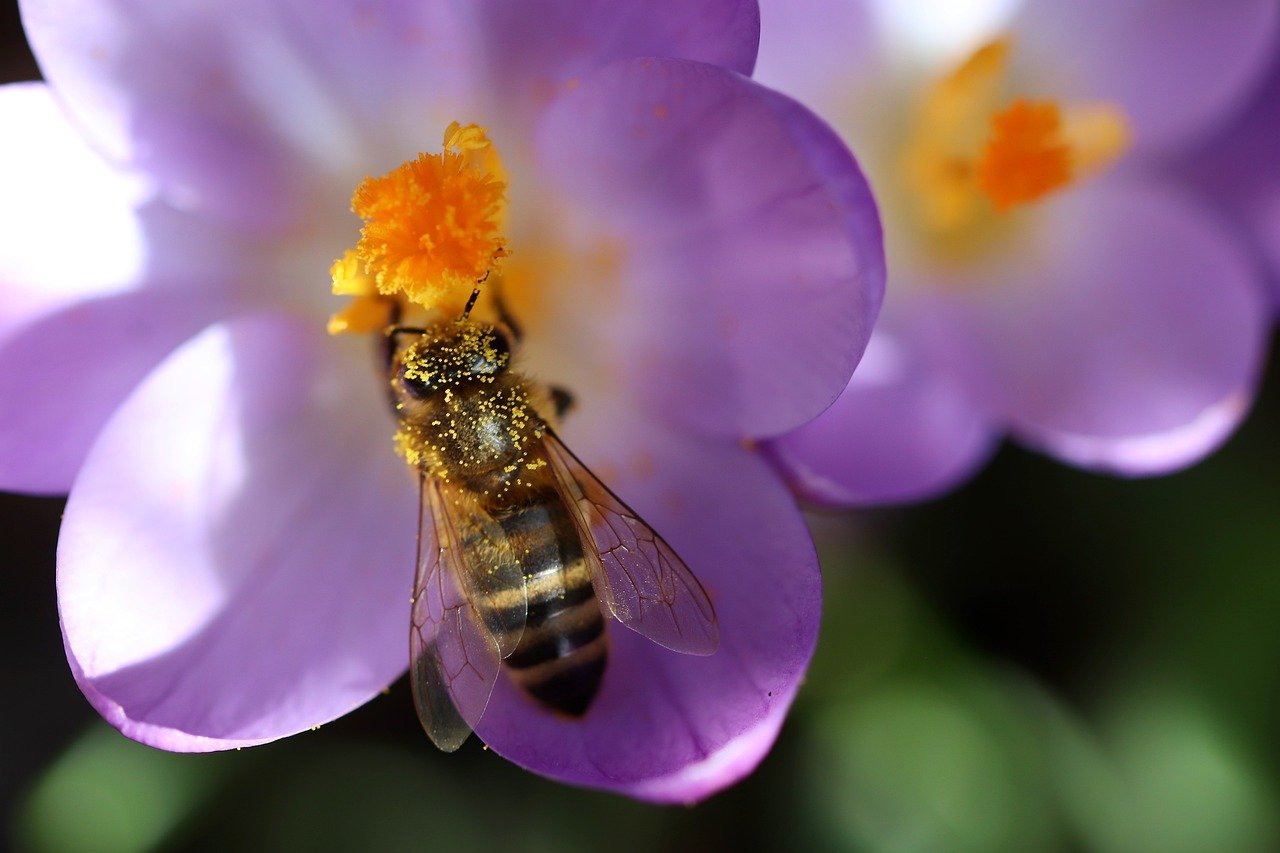

In [242]:
from IPython.display import Image

Image(filename=r"C:\Users\10inm\deep_learning\Keras-ML-DL-DeepLizard\mobilenet_samples\bee.jpg", width=300, height=200)

In [243]:
# preprocess image for MobileNet
preprocessed_image = prepare_image('bee.jpg')
# predict class
predictions = mobile.predict(preprocessed_image)
# predict the top5 classes
results = imagenet_utils.decode_predictions(predictions)
# print results
results

[[('n02206856', 'bee', 0.9529406),
  ('n02190166', 'fly', 0.02744258),
  ('n02169497', 'leaf_beetle', 0.0110973045),
  ('n02264363', 'lacewing', 0.0029144369),
  ('n02219486', 'ant', 0.002538274)]]

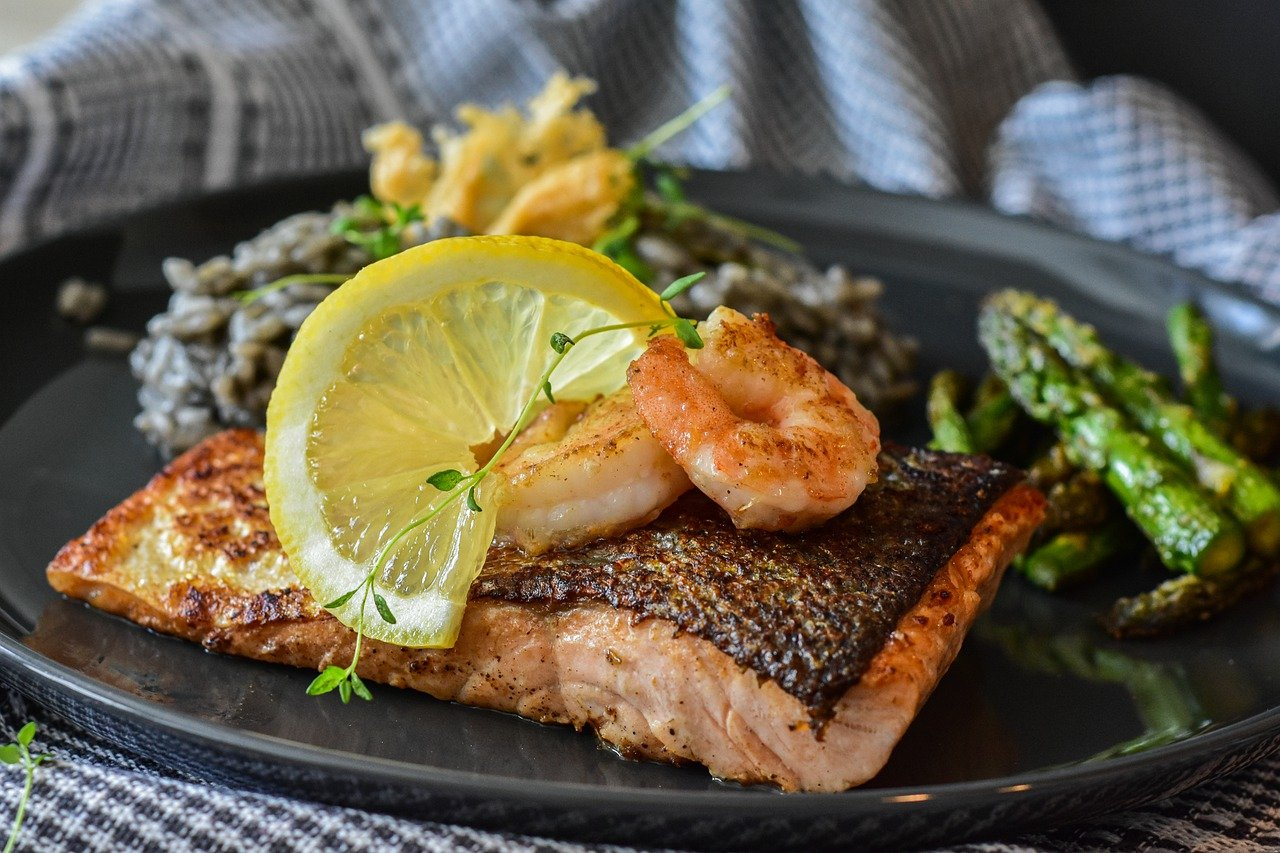

In [244]:
Image(filename=r"C:\Users\10inm\deep_learning\Keras-ML-DL-DeepLizard\mobilenet_samples\salmon.jpg", width=300, height=200)

In [245]:
# preprocess image for MobileNet
preprocessed_image = prepare_image('salmon.jpg')
# predict class
predictions = mobile.predict(preprocessed_image)
# predict the top5 classes
results = imagenet_utils.decode_predictions(predictions)
# print results
results

[[('n07716358', 'zucchini', 0.24804464),
  ('n07579787', 'plate', 0.14907075),
  ('n01983481', 'American_lobster', 0.09698729),
  ('n07717410', 'acorn_squash', 0.07475581),
  ('n01981276', 'king_crab', 0.055713393)]]

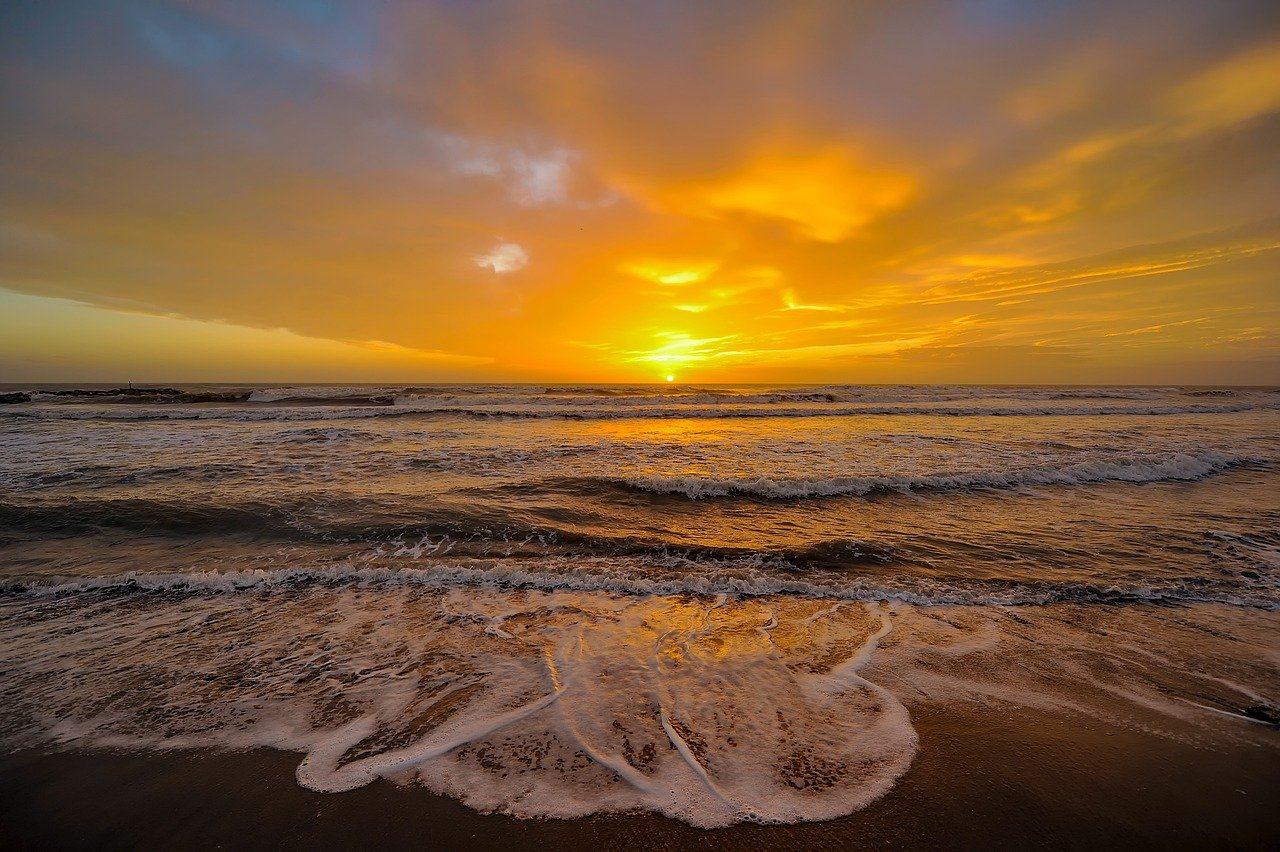

In [246]:
Image(filename=r"C:\Users\10inm\deep_learning\Keras-ML-DL-DeepLizard\mobilenet_samples\sunset.jpg", width=300, height=200)

In [247]:
# preprocess image for MobileNet
preprocessed_image = prepare_image('sunset.jpg')
# predict class
predictions = mobile.predict(preprocessed_image)
# predict the top5 classes
results = imagenet_utils.decode_predictions(predictions)
# print results
results

[[('n09428293', 'seashore', 0.8928213),
  ('n09332890', 'lakeside', 0.021283343),
  ('n09421951', 'sandbar', 0.017549327),
  ('n09288635', 'geyser', 0.010855788),
  ('n02814860', 'beacon', 0.009419295)]]

 <a name='mobilenettuning'></a>
 # [P17: MobileNet Tuning #1](https://deeplizard.com/learn/video/FNqp4ZY0wDY)

[Sign-Language Digits Dataset](#https://github.com/ardamavi/Sign-Language-Digits-Dataset)

In [248]:
# Organize data into train, valid, test dirs
os.chdir(r"C:\Users\10inm\deep_learning\Keras-ML-DL-DeepLizard\sign_language_digits")
# if the file does not already exists
if os.path.isdir('train/0/') is False: 
    # create subfolders
    os.mkdir('train')
    os.mkdir('valid')
    os.mkdir('test')
    
    # iterate through all 10 folders
    for i in range(0, 10):
        # move folder into train
        shutil.move(f'{i}', 'train')
        # create subfolder
        os.mkdir(f'valid/{i}')
        os.mkdir(f'test/{i}')
        
        # sample 30 random imgs within train dir
        valid_samples = random.sample(os.listdir(f'train/{i}'), 30)
        # for each of the 30 samples
        for j in valid_samples:
            # move sample from train to valid dir
            shutil.move(f'train/{i}/{j}', f'valid/{i}')
        
        # sample 5 random imgs within train dir
        test_samples = random.sample(os.listdir(f'train/{i}'), 5)
        # for each for the 5 samples
        for k in test_samples:
            # move sample from train to test dir
            shutil.move(f'train/{i}/{k}', f'test/{i}')
os.chdir('../..')

In [249]:
train_path = r"C:\Users\10inm\deep_learning\Keras-ML-DL-DeepLizard\sign_language_digits\train"
valid_path = r"C:\Users\10inm\deep_learning\Keras-ML-DL-DeepLizard\sign_language_digits\valid"
test_path = r"C:\Users\10inm\deep_learning\Keras-ML-DL-DeepLizard\sign_language_digits\test"

In [250]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), batch_size=10)
    
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), batch_size=10)

test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)

Found 1712 images belonging to 10 classes.
Found 300 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


In [251]:
assert train_batches.n == 1712
assert valid_batches.n == 300
assert test_batches.n == 50
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 10

 <a name='mobilenettuning2'></a>
 # [P18: MobileNet Tuning #2](https://deeplizard.com/learn/video/Zrt76AIbeh4)

In [275]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [264]:
params = count_params(mobile)
assert params['non_trainable_params'] == 21888

In [302]:
# exclude 6 last layers
x = mobile.layers[-2].output
# output layer
output = layers.Dense(units=10, activation='softmax')(x) # pass the layers stored in x

In [303]:
model = tf.keras.Model(inputs=mobile.input, outputs=output)

In [304]:
# iterate through the last 23 layers
for layer in model.layers[:-23]:
    # free those layers
    layer.trainable = False

In [305]:
model.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                    

In [307]:
# compile model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [308]:
# train model
model.fit(x=train_batches, validation_data=valid_batches, epochs=30, verbose=1)

Epoch 1/30
172/172 [==============================] - 92s 526ms/step - loss: 0.6954 - accuracy: 0.7973 - val_loss: 0.6013 - val_accuracy: 0.8267
Epoch 2/30
172/172 [==============================] - 75s 435ms/step - loss: 0.1318 - accuracy: 0.9562 - val_loss: 0.4042 - val_accuracy: 0.8700
Epoch 3/30
172/172 [==============================] - 75s 435ms/step - loss: 0.0645 - accuracy: 0.9784 - val_loss: 0.1469 - val_accuracy: 0.9600
Epoch 4/30
172/172 [==============================] - 75s 438ms/step - loss: 0.0421 - accuracy: 0.9871 - val_loss: 0.3325 - val_accuracy: 0.9000
Epoch 5/30
172/172 [==============================] - 76s 442ms/step - loss: 0.0308 - accuracy: 0.9895 - val_loss: 0.0603 - val_accuracy: 0.9767
Epoch 6/30
172/172 [==============================] - 76s 440ms/step - loss: 0.0204 - accuracy: 0.9953 - val_loss: 0.0395 - val_accuracy: 0.9833
Epoch 7/30
172/172 [==============================] - 87s 508ms/step - loss: 0.0095 - accuracy: 0.9977 - val_loss: 0.0916 - val_ac

In [309]:
test_labels = test_batches.classes

In [310]:
predictions = model.predict(x=test_batches, verbose=0)

In [312]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

In [314]:
test_batches.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}

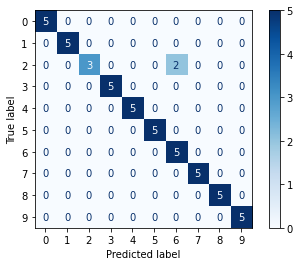

In [315]:
ConfusionMatrixDisplay.from_predictions(y_true=test_labels,
                                        y_pred=predictions.argmax(axis=1), 
                                       normalize=None,
                                       display_labels=['0','1','2','3','4','5','6','7','8','9'],
                                       cmap=plt.cm.Blues)